In [1]:
#downloading MINST dataset
import torch
import torchvision.transforms as transforms
from torchvision import datasets
 
# loading training data
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)
#loading test data
test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor())

In [2]:
print(f"Number of trainingsamples {len(train_dataset)} \n number of test samples {len(test_dataset)}")
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn import datasets # Import train_test_split function
from sklearn.model_selection import train_test_split  #Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd

Number of trainingsamples 60000 
 number of test samples 10000


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

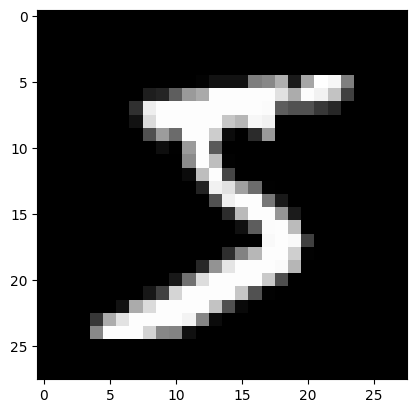

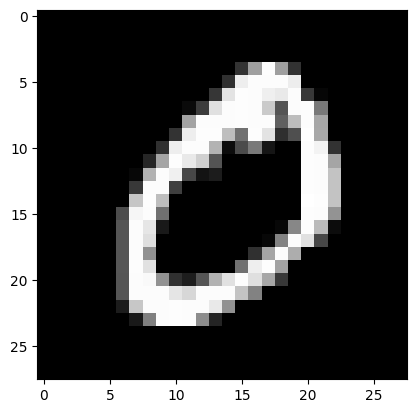

In [3]:
import matplotlib.pyplot as plt
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
print(img_5)
plt.imshow(img_5, cmap='gray')
plt.show()
img_0 = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(img_0, cmap='gray')
plt.show()

In [4]:
from torch.utils.data import DataLoader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

In [5]:
class LogisticRegression(torch.nn.Module):    
    # build the constructor
    def __init__(self, n_inputs, n_outputs):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(n_inputs, n_outputs)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [6]:
n_inputs = 28*28 # makes a 1D vector of 784
n_outputs = 10
log_regr = LogisticRegression(n_inputs, n_outputs)

In [7]:
optimizer = torch.optim.SGD(log_regr.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = log_regr(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        # Loss.append(loss.item())
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = log_regr(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum()
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 2.1715054512023926. Accuracy: 65.52
Epoch: 1. Loss: 2.0722594261169434. Accuracy: 74.21
Epoch: 2. Loss: 2.0514066219329834. Accuracy: 77.54
Epoch: 3. Loss: 2.051614761352539. Accuracy: 79.72
Epoch: 4. Loss: 1.948235034942627. Accuracy: 81.13
Epoch: 5. Loss: 1.9609920978546143. Accuracy: 81.81
Epoch: 6. Loss: 1.899621605873108. Accuracy: 82.2
Epoch: 7. Loss: 1.8653417825698853. Accuracy: 82.62
Epoch: 8. Loss: 1.8206952810287476. Accuracy: 82.92
Epoch: 9. Loss: 1.8057811260223389. Accuracy: 83.26


In [8]:
#Linear regression implementation
import torch.nn as nn

lin_reg_model = nn.Sequential(
    nn.Linear(28*28,10),
    nn.Sigmoid()
)
print(lin_reg_model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): Sigmoid()
)


In [9]:
optimizer = torch.optim.Adam(lin_reg_model.parameters(), lr=0.001)
# defining Cross-Entropy loss
criterion = torch.nn.CrossEntropyLoss()
 
epochs = 10
Loss = []
acc = []
predicted_array = []
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = lin_reg_model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    predictions = []
    for images, labels in test_loader:
        outputs = lin_reg_model(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        predictions.append(predicted.numpy())
        correct += (predicted == labels).sum()
    predicted_array.append(np.concatenate(predictions, axis=0))
    accuracy = 100 * (correct.item()) / len(test_dataset)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

Epoch: 0. Loss: 1.564040184020996. Accuracy: 89.74
Epoch: 1. Loss: 1.588471531867981. Accuracy: 90.42
Epoch: 2. Loss: 1.5226218700408936. Accuracy: 90.98
Epoch: 3. Loss: 1.572791337966919. Accuracy: 91.22
Epoch: 4. Loss: 1.5087890625. Accuracy: 91.25
Epoch: 5. Loss: 1.5315793752670288. Accuracy: 91.19
Epoch: 6. Loss: 1.599723219871521. Accuracy: 91.47
Epoch: 7. Loss: 1.570723295211792. Accuracy: 91.63
Epoch: 8. Loss: 1.585627794265747. Accuracy: 91.58
Epoch: 9. Loss: 1.5024093389511108. Accuracy: 91.67


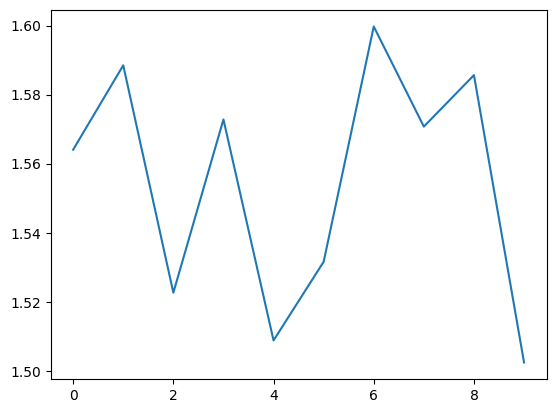

In [10]:
plt.plot(range(len(Loss)), Loss)
#plt.plot(range(len(acc)), acc)

In [11]:
from sklearn import datasets # Import train_test_split function
from sklearn.model_selection import train_test_split  #Import scikit-learn dataset library
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [12]:
images_train, labels_train = zip(*train_dataset)
images_train = np.array(images_train)
labels_train = np.array(labels_train)

In [13]:
clf = svm.SVC(kernel="linear")
images_train = images_train.reshape(images_train.shape[0], -1)


In [14]:
images_train.shape

(60000, 784)

In [15]:
clf.fit(images_train, labels_train)

SVC(kernel='linear')

In [16]:
images_test, labels_test = zip(*test_dataset)
images_test = np.array(images_test)
labels_test = np.array(labels_test)
images_test = images_test.reshape(images_test.shape[0], -1)
svm_pred = clf.predict(images_test)

In [17]:
print(metrics.accuracy_score(labels_test, svm_pred))

0.9404


In [18]:
from sklearn.ensemble import RandomForestClassifier 

In [19]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(images_train, labels_train)

RandomForestClassifier()

In [20]:
rf_pred = rf.predict(images_test)
metrics.accuracy_score(rf_pred, labels_test)

0.9701

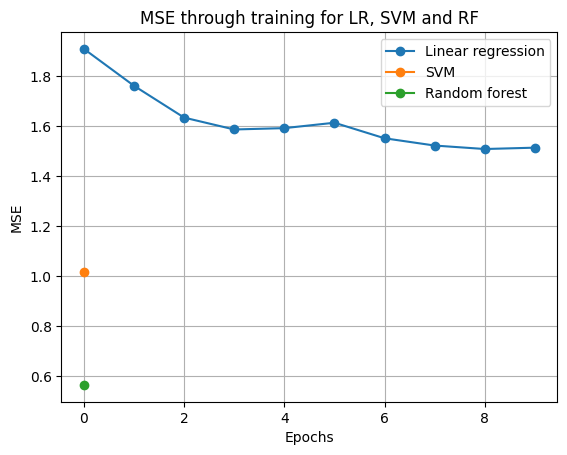

In [21]:
rf_mse = np.array([metrics.mean_squared_error(labels_test, rf_pred)])
svm_mse = np.array([metrics.mean_squared_error(labels_test, svm_pred)])
lr_mse = [metrics.mean_squared_error(labels_test, pred) for pred in predicted_array]
plt.plot(range(len(lr_mse)), lr_mse, marker='o')
plt.plot([0], svm_mse, marker='o')
plt.plot([0], rf_mse, marker='o')
plt.grid()
plt.title("MSE through training for LR, SVM and RF")
plt.legend(["Linear regression", "SVM", "Random forest"])
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()


In [22]:
##A.3.2
import pandas as pd                                                                            

In [23]:
weather_df = pd.read_csv("seattle-weather.csv")
print(weather_df.filter(["date", "percipitation", "temp_max","temp_min","wind"]))

            date  temp_max  temp_min  wind
0     2012-01-01      12.8       5.0   4.7
1     2012-01-02      10.6       2.8   4.5
2     2012-01-03      11.7       7.2   2.3
3     2012-01-04      12.2       5.6   4.7
4     2012-01-05       8.9       2.8   6.1
...          ...       ...       ...   ...
1456  2015-12-27       4.4       1.7   2.9
1457  2015-12-28       5.0       1.7   1.3
1458  2015-12-29       7.2       0.6   2.6
1459  2015-12-30       5.6      -1.0   3.4
1460  2015-12-31       5.6      -2.1   3.5

[1461 rows x 4 columns]


In [24]:
weather_input, weather_label = weather_df.filter(["precipitation","temp_max","temp_min","wind"]).to_numpy(), weather_df["weather"].map({"drizzle":0, "rain":1, "sun":2, "snow":3, "fog":4}).to_numpy()
print(weather_input)
weather_input = torch.tensor(weather_input, dtype=torch.float32)
weather_label = torch.tensor(weather_label,)
print(weather_label)
weather_input_train, weather_input_test, weather_label_train,weather_label_test = train_test_split(weather_input, weather_label, train_size=0.7)
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

[[ 0.  12.8  5.   4.7]
 [10.9 10.6  2.8  4.5]
 [ 0.8 11.7  7.2  2.3]
 ...
 [ 0.   7.2  0.6  2.6]
 [ 0.   5.6 -1.   3.4]
 [ 0.   5.6 -2.1  3.5]]
tensor([0, 1, 1,  ..., 4, 2, 2])


In [33]:
weather_model = nn.Sequential(
    nn.Linear(4,5),
    nn.Softmax()
)


In [34]:
optimizer = torch.optim.Adam(weather_model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()
predicted_w_array = []
epochs = 50
Loss = []
acc = []
for epoch in range(epochs):
    for i in range(0, len(weather_input_train), batach_size):
        x_batch = weather_input_train[i:i+batach_size]
        y_batch = weather_label_train[i:i+batach_size]
        optimizer.zero_grad()
        outputs = weather_model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    Loss.append(loss.item())
    correct = 0
    predictions_w = []
    for i in range(0, len(weather_input_test), batach_size):
        x_batch = weather_input_test[i:i+batach_size]
        y_batch = weather_label_test[i:i+batach_size]
        outputs = weather_model(x_batch)
        _, predicted = torch.max(outputs.data, 1)
        predictions_w.append(predicted.numpy())
        correct += (predicted == y_batch).sum()
    predicted_w_array.append(np.concatenate(predictions_w, axis=0))
    accuracy = 100 * (correct.item()) / len(weather_input_test)
    acc.append(accuracy)
    print('Epoch: {}. Loss: {}. Accuracy: {}'.format(epoch, loss.item(), accuracy))

/home/img/Code/Python/AICourse/AILabs/lib/python3.13/site-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 0. Loss: 1.373961329460144. Accuracy: 46.69703872437358
Epoch: 1. Loss: 1.3691926002502441. Accuracy: 46.924829157175395
Epoch: 2. Loss: 1.3669039011001587. Accuracy: 46.924829157175395
Epoch: 3. Loss: 1.365566611289978. Accuracy: 46.924829157175395
Epoch: 4. Loss: 1.3646624088287354. Accuracy: 46.924829157175395
Epoch: 5. Loss: 1.3640925884246826. Accuracy: 46.924829157175395
Epoch: 6. Loss: 1.3639475107192993. Accuracy: 47.15261958997722
Epoch: 7. Loss: 1.3645094633102417. Accuracy: 47.608200455580864
Epoch: 8. Loss: 1.3664346933364868. Accuracy: 48.06378132118451
Epoch: 9. Loss: 1.371108889579773. Accuracy: 48.51936218678816
Epoch: 10. Loss: 1.3810514211654663. Accuracy: 49.430523917995444
Epoch: 11. Loss: 1.3994694948196411. Accuracy: 49.20273348519362
Epoch: 12. Loss: 1.39569091796875. Accuracy: 52.84738041002278
Epoch: 13. Loss: 1.3790372610092163. Accuracy: 61.50341685649203
Epoch: 14. Loss: 1.321258783340454. Accuracy: 67.88154897494306
Epoch: 15. Loss: 1.303761005401611

In [35]:
weather_clf = svm.SVC(kernel="linear")

In [36]:
weather_clf.fit(weather_input_train, weather_label_train)

SVC(kernel='linear')

In [37]:
weather_svm_pred = weather_clf.predict(weather_input_test)
metrics.accuracy_score(weather_svm_pred, weather_label_test)

0.8337129840546698

In [38]:
weather_rf = RandomForestClassifier(n_estimators=100, max_depth=8)
weather_rf.fit(weather_input_train, weather_label_train)


RandomForestClassifier(max_depth=8)

In [39]:
weather_rf_pred = weather_rf.predict(weather_input_test)
metrics.accuracy_score(weather_rf_pred, weather_label_test)

0.835990888382688

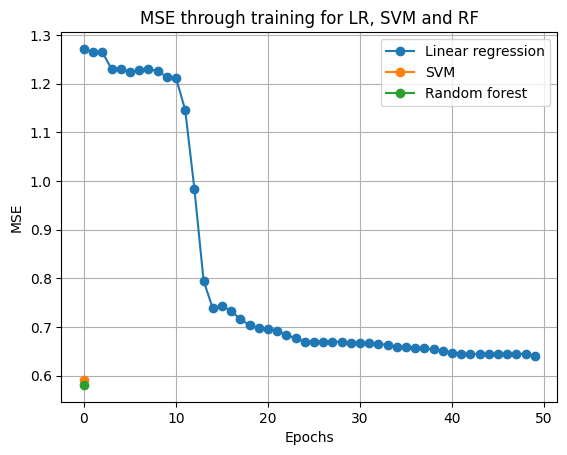

In [45]:
weather_rf_mse = np.array([metrics.mean_squared_error(weather_label_test, weather_rf_pred)])
weather_svm_mse = np.array([metrics.mean_squared_error(weather_label_test, weather_svm_pred)])
weather_lr_mse = [metrics.mean_squared_error(weather_label_test, pred) for pred in predicted_w_array]
plt.plot(range(len(weather_lr_mse)), weather_lr_mse, marker='o')
plt.plot([0], weather_svm_mse, marker='o')
plt.plot([0], weather_rf_mse, marker='o')
plt.grid()
plt.title("MSE through training for LR, SVM and RF")
plt.legend(["Linear regression", "SVM", "Random forest"])
plt.ylabel("MSE")
plt.xlabel("Epochs")
plt.show()

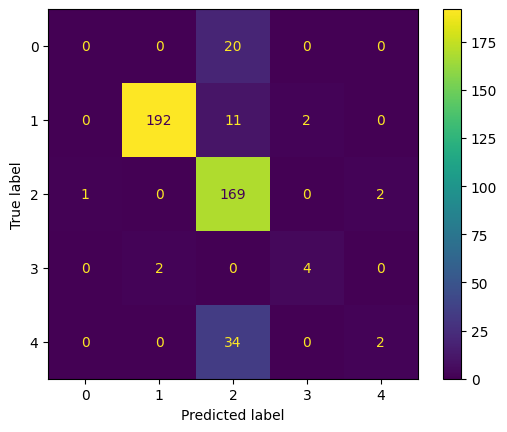

In [40]:
array = metrics.confusion_matrix(weather_label_test, weather_rf_pred)
metrics.ConfusionMatrixDisplay(array).plot()
